In [1]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  adwaita-icon-theme at-spi2-core ca-certificates-java dconf-gsettings-backend
  dconf-service default-jre-headless fontconfig fonts-dejavu-core
  fonts-dejavu-extra glib-networking glib-networking-common
  glib-networking-services gsettings-desktop-schemas gtk-update-icon-cache
  hicolor-icon-theme humanity-icon-theme java-common libasound2
  libasound2-data libatk-bridge2.0-0 libatk-wrapper-java
  libatk-wrapper-java-jni libatk1.0-0 libatk1.0-data libatspi2.0-0
  libavahi-client3 libavahi-common-data libavahi-common3 libcairo-gobject2
  libcairo2 libcolord2 libcroco3 libcups2 libdatrie1 libdconf1 libdrm-amdgpu1
  libdrm-intel1 libdrm-nouveau2 libdrm-radeon1 libepoxy0 libfontenc1
  libgdk-pixbuf2.0-0 libgdk-pixbuf2.0-bin libgdk-pixbuf2.0-common libgif7
  libgl1 libgl1-mesa-dri libgl1-mesa-glx libglx-mesa0 libglx0 libgtk-3-0
  libgtk-3-bin

installed java..since, H2O is a Java-based software for data modeling and general computing. 

In [2]:
# Installing H2o
! pip install h2o

    100% |████████████████████████████████| 120.6MB 244kB/s 
    100% |████████████████████████████████| 51kB 16.3MB/s 
  Running setup.py bdist_wheel for h2o ... - \ | / - \ | done
  Stored in directory: /root/.cache/pip/wheels/82/79/1a/0a69bcc2bdcb643b310ef61cc1a4d2ca3abe03059712cc804e
  Running setup.py bdist_wheel for tabulate ... - \ done
  Stored in directory: /root/.cache/pip/wheels/2a/85/33/2f6da85d5f10614cbe5a625eab3b3aebfdf43e7b857f25f829
Successfully built h2o tabulate


In [2]:
# import all the necessary lib

import h2o
import time
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
%matplotlib inline

from h2o.estimators.random_forest import H2ORandomForestEstimator
from sklearn import metrics


Dataset Information

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

ATTRIBUTES DESCRIPTION-

There are 25 variables:

1. ID: ID of each client
2. LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
3. SEX: Gender (1=male, 2=female)
4. EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
5. MARRIAGE: Marital status (1=married, 2=single, 3=others)
6. AGE:Age in years
7. PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
8. PAY_2: Repayment status in August, 2005 (scale same as above)
9. PAY_3: Repayment status in July, 2005 (scale same as above)
10. PAY_4: Repayment status in June, 2005 (scale same as above)
11. PAY_5: Repayment status in May, 2005 (scale same as above)
12. PAY_6: Repayment status in April, 2005 (scale same as above)
13. BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
14. BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
15. BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
16. BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
17. BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
18. BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
19. PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
20. PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
21. PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
22. PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
23. PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
24. PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
25. default.payment.next.month: Default payment (1=yes, 0=no)

In [4]:
# Uploading the file to google colab
from google.colab import files
uploaded = files.upload()


Saving UCI_Credit_Card.csv to UCI_Credit_Card (1).csv


In [7]:
#read the data
df_creditcarddata = pd.read_csv("UCI_Credit_Card.csv")

In [5]:
#Initialize H2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_152-release"; OpenJDK Runtime Environment (build 1.8.0_152-release-1056-b12); OpenJDK 64-Bit Server VM (build 25.152-b12, mixed mode)
  Starting server from /Users/Dippies/anaconda3/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/19/ry6knvh11c762pyb_49hts940000gn/T/tmpie2r8e7u
  JVM stdout: /var/folders/19/ry6knvh11c762pyb_49hts940000gn/T/tmpie2r8e7u/h2o_Dippies_started_from_python.out
  JVM stderr: /var/folders/19/ry6knvh11c762pyb_49hts940000gn/T/tmpie2r8e7u/h2o_Dippies_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.20.0.8
H2O cluster version age:,1 month and 21 days
H2O cluster name:,H2O_from_python_Dippies_xmu4gl
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [8]:
#changing data to a h2o frame
hf_creditcarddata = h2o.H2OFrame(df_creditcarddata)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [10]:
hf_creditcarddata.head() #check if loaded properly

ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,50000,1,1,2,37,0,0,0,0,0,0,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800,0
7,500000,1,1,2,29,0,0,0,0,0,0,367965,412023,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
8,100000,2,2,2,23,0,-1,-1,0,0,-1,11876,380,601,221,-159,567,380,601,0,581,1687,1542,0
9,140000,2,3,1,28,0,0,2,0,0,0,11285,14096,12108,12211,11793,3719,3329,0,432,1000,1000,1000,0
10,20000,1,3,2,35,-2,-2,-2,-2,-1,-1,0,0,0,0,13007,13912,0,0,0,13007,1122,0,0


In [11]:
#check dimensions of the data
hf_creditcarddata.shape

(30000, 25)

In [12]:
hf_creditcarddata.describe() #summaryhf_creditcarddata

Rows:30000
Cols:25




,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
type,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int,int
mins,1.0,10000.0,1.0,0.0,0.0,21.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-165580.0,-69777.0,-157264.0,-170000.0,-81334.0,-339603.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,15000.5,167484.32266666702,1.6037333333333341,1.8531333333333406,1.551866666666661,35.48549999999951,-0.01670000000000008,-0.13376666666666645,-0.16619999999999988,-0.2206666666666661,-0.2662000000000006,-0.2910999999999984,51223.33090000027,49179.07516666643,47013.1547999997,43262.94896666664,40311.40096666685,38871.760399999795,5663.580500000035,5921.163499999985,5225.681499999979,4826.076866666658,4799.387633333337,5215.502566666659,0.2212
maxs,30000.0,1000000.0,2.0,6.0,3.0,79.0,8.0,8.0,8.0,8.0,8.0,8.0,964511.0,983931.0,1664089.0,891586.0,927171.0,961664.0,873552.0,1684259.0,896040.0,621000.0,426529.0,528666.0,1.0
sigma,8660.398374208891,129747.66156720248,0.4891291960902599,0.7903486597207285,0.5219696006132472,9.217904068090148,1.1238015279973328,1.1971859730345495,1.1968675684465677,1.169138622402336,1.133187406002751,1.1499876256078958,73635.86057552972,71173.76878252828,69349.38742703683,64332.85613391641,60797.15577026471,59554.107536745854,16563.280354025774,23040.870402057197,17606.961469803096,15666.15974403206,15278.30567914475,17777.465775435325,0.41506180569093337
zeros,0,0,0,14,54,0,14737,15730,15764,16455,16947,16286,2008,2506,2870,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,1.0,20000.0,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2.0,120000.0,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3.0,90000.0,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0


There are 30,000 distinct credit card clients and there are 25 different features.

There are no missing data in the whole dataset.

1. average value for amount of credit card limit = 167484
2. Max number of clients have a marriage status of others - meaning unknown/divorced
3. 35yrs is the average age of the clients
4. Education status is unkown for max clients
5. It says there are 22.1% of the credit card contracts that will default by next month.

In [13]:
hf_creditcarddata.columns

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default.payment.next.month']

**EXPLORE DEFAULTING**

In [14]:
hf_creditcarddata['default.payment.next.month'].table() 

default.payment.next.month,Count
0,23364
1,6636


/Users/Dippies/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


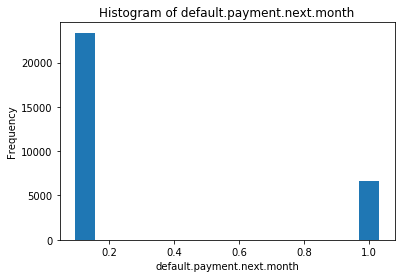

In [15]:
hf_creditcarddata['default.payment.next.month'].hist()

In [38]:
df_creditcarddata = df_creditcarddata.drop(["ID"], axis = 1) #not needed for exploration or for evaluation purpose
df_creditcarddata.head()

hf_creditcarddata = hf_creditcarddata.drop(["ID"], axis = 1) #not needed for exploration or for evaluation purpose
hf_creditcarddata.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**CHECKING DATA UNBALANCE**

In [18]:
print((df_creditcarddata["default.payment.next.month"].value_counts())*100/len(df_creditcarddata["default.payment.next.month"]))


0    77.88
1    22.12
Name: default.payment.next.month, dtype: float64


In [19]:
#distribution
distribution = hf_creditcarddata[['AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6', 'LIMIT_BAL']]

/Users/Dippies/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1710: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


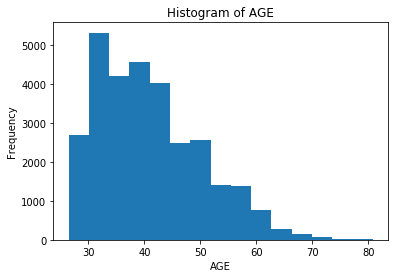

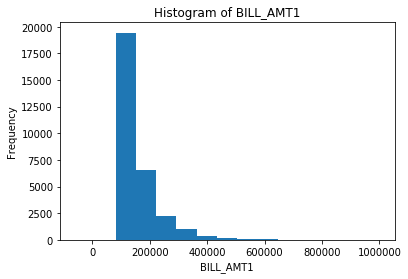

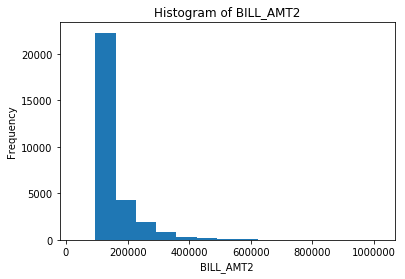

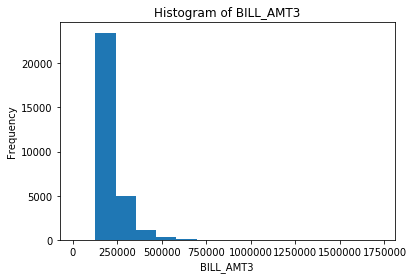

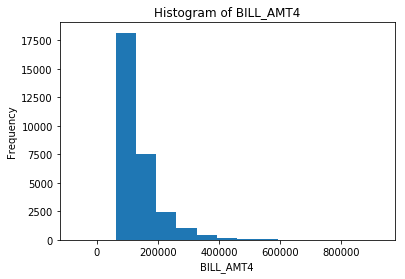

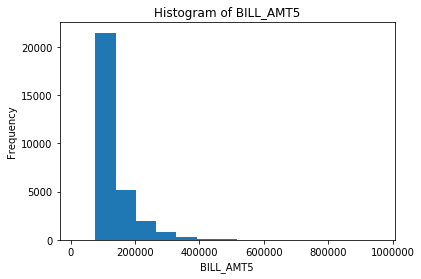

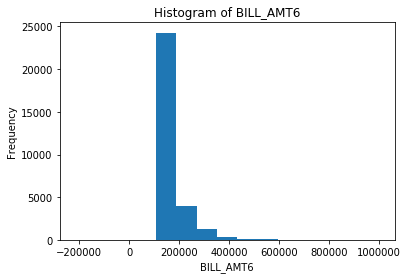

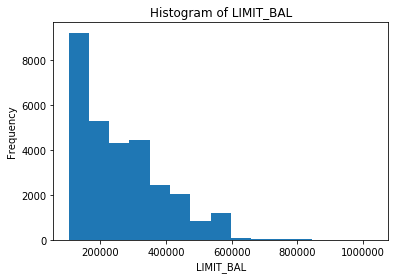

In [20]:
for col in distribution.columns:
    distribution[col].hist()

- largest group of credut limit is apparently for amount of 10,00,000.00. Also, high no of defaulters can be seen with credit limit of 200000 or less
- 35yrs is the average age for the customers

In [21]:
# Find number of default by sex
cols = ["default.payment.next.month","SEX"]
S = hf_creditcarddata.group_by(by=cols).count(na ="all")
S.get_frame()

default.payment.next.month,SEX,nrow
0,1,9015
0,2,14349
1,1,2873
1,2,3763


In [22]:
#default vs education
cols = ["default.payment.next.month","EDUCATION"]
E = hf_creditcarddata.group_by(by=cols).count(na ="all")
E.get_frame()

default.payment.next.month,EDUCATION,nrow
0,0,14
0,1,8549
0,2,10700
0,3,3680
0,4,116
0,5,262
0,6,43
1,1,2036
1,2,3330
1,3,1237


In [23]:
#default vs MARRIAGE
cols = ["default.payment.next.month","MARRIAGE"]
M = hf_creditcarddata.group_by(by=cols).count(na ="all")
M.get_frame()

default.payment.next.month,MARRIAGE,nrow
0,0,49
0,1,10453
0,2,12623
0,3,239
1,0,5
1,1,3206
1,2,3341
1,3,84


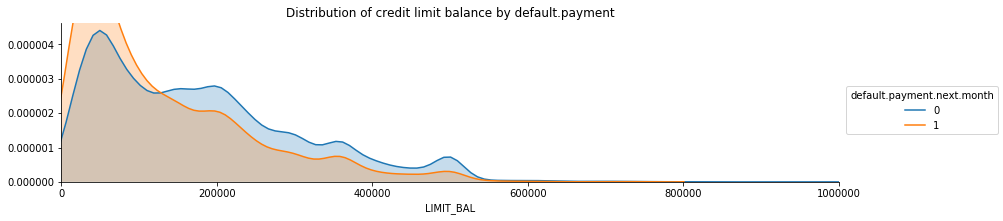

In [27]:
#default vs limit bal
fig = sns.FacetGrid(df_creditcarddata, hue='default.payment.next.month', aspect=4)
fig.map(sns.kdeplot, 'LIMIT_BAL', shade=True)
oldest = df_creditcarddata['LIMIT_BAL'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of credit limit balance by default.payment')
fig.add_legend()

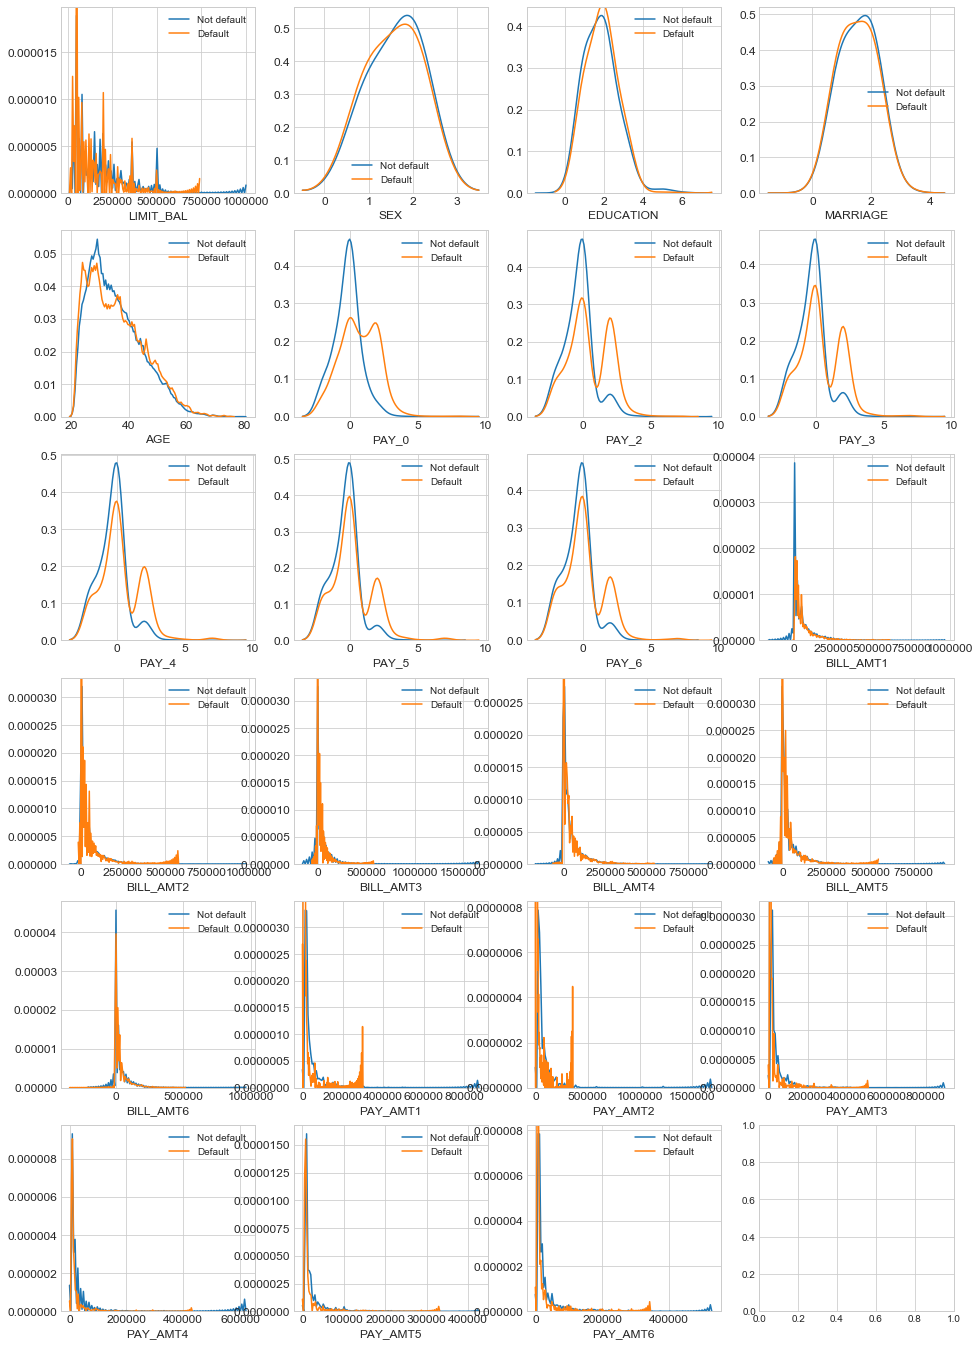

In [31]:
features = [f for f in hf_creditcarddata.columns if f not in ['default.payment.next.month']]

i = 0
target_0 = hf_creditcarddata[hf_creditcarddata['default.payment.next.month'] == 0].as_data_frame()
target_1 = hf_creditcarddata[hf_creditcarddata['default.payment.next.month'] == 1].as_data_frame()

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(6,4,figsize=(16,24))

for feature in features:
    i += 1
    plt.subplot(6,4,i)
    sns.kdeplot(target_0[feature], bw=0.5,label="Not default")
    sns.kdeplot(target_1[feature], bw=0.5,label="Default")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

# source : Kaggle

**GAUGE THE CORRELATION **

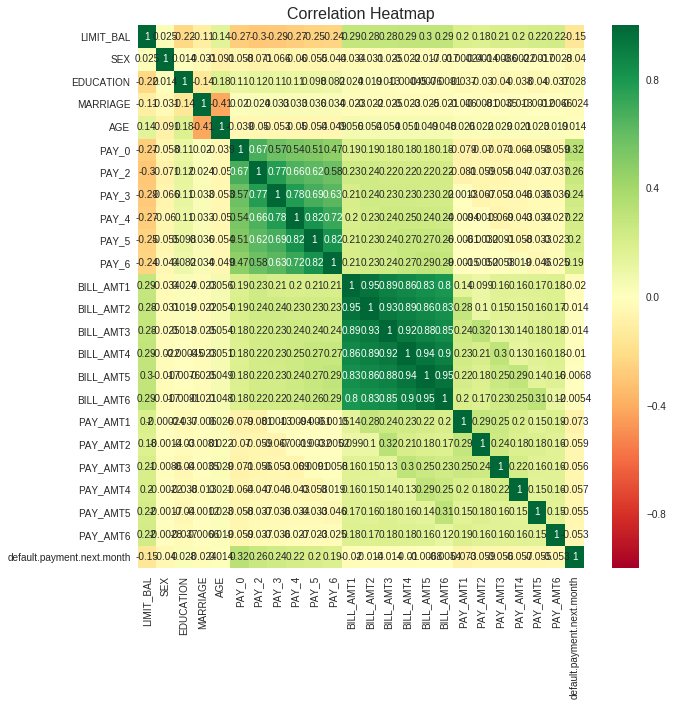

In [61]:
plt.figure(figsize=(10,10))
corr = dataset.cor().as_data_frame()
corr.index = dataset.columns
sns.heatmap(corr, annot = True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()

* Amt of Bill statement

here we can observe that the correlation b/w the Amount of bill statement is decreasing with distance between months. Lowest correlations are between Sept-April.

* Repayment Status

Here as well, it can be seen that correlation decreases b/w the months

* Previous Payments

Similarly, there is no correlation b/w amount of previous payments.

**CORRELATION WITH THE RESPONSE VARIABLE**

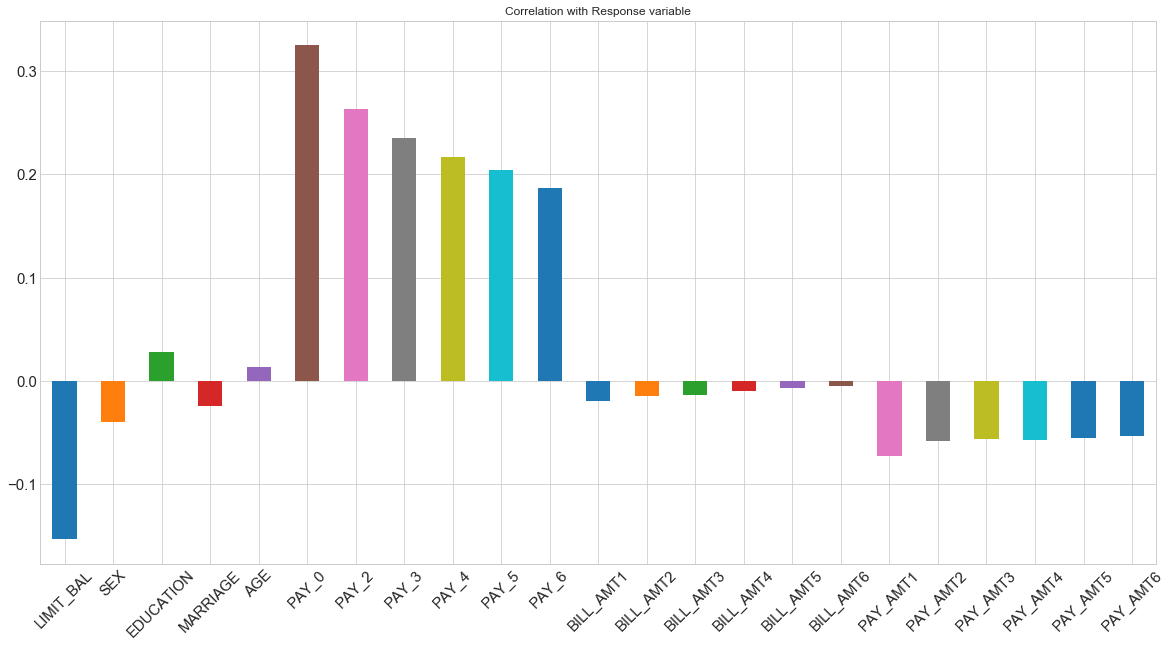

In [40]:
df_creditcarddata.drop(['default.payment.next.month'], \
         axis = 1).corrwith(df_creditcarddata['default.payment.next.month']).\
         plot.bar(figsize=(20,10), \
         title = 'Correlation with Response variable', \
         fontsize = 15, rot = 45, grid = True)

**Last, check the history of - **

1. Past payment delays
2. Bill statement - credit/debit getting accrued
3. Payments performed in the previous month

In [41]:
import re
pattern = re.compile("^PAY_[0-9]+$")
payment_delay = [ x for x in df_creditcarddata.columns if (pattern.match(x))]
df_creditcarddata[payment_delay].describe().round(2)

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,-0.02,-0.13,-0.17,-0.22,-0.27,-0.29
std,1.12,1.20,1.20,1.17,1.13,1.15
min,-2.00,-2.00,-2.00,-2.00,-2.00,-2.00
25%,-1.00,-1.00,-1.00,-1.00,-1.00,-1.00
50%,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.00,0.00,0.00,0.00,0.00,0.00
max,8.00,8.00,8.00,8.00,8.00,8.00


In [42]:
pattern = re.compile("^BILL_AMT[0-9]+$")
bill_columns = [ x for x in df_creditcarddata.columns if (pattern.match(x))]
df_creditcarddata[bill_columns].describe().round(2)

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,51223.33,49179.08,47013.15,43262.95,40311.40,38871.76
std,73635.86,71173.77,69349.39,64332.86,60797.16,59554.11
min,-165580.00,-69777.00,-157264.00,-170000.00,-81334.00,-339603.00
25%,3558.75,2984.75,2666.25,2326.75,1763.00,1256.00
50%,22381.50,21200.00,20088.50,19052.00,18104.50,17071.00
75%,67091.00,64006.25,60164.75,54506.00,50190.50,49198.25
max,964511.00,983931.00,1664089.00,891586.00,927171.00,961664.00


In [43]:
pattern = re.compile("^PAY_AMT[0-9]+$")
pay_amount_columns = [ x for x in df_creditcarddata.columns if (pattern.match(x))]
df_creditcarddata[pay_amount_columns].describe().round(2)

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,5663.58,5921.16,5225.68,4826.08,4799.39,5215.50
std,16563.28,23040.87,17606.96,15666.16,15278.31,17777.47
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,1000.00,833.00,390.00,296.00,252.50,117.75
50%,2100.00,2009.00,1800.00,1500.00,1500.00,1500.00
75%,5006.00,5000.00,4505.00,4013.25,4031.50,4000.00
max,873552.00,1684259.00,896040.00,621000.00,426529.00,528666.00


**MODEL BUILDING**

**H2O.ai package.**

1. It handles categorical variables out of the box without having to do any encoding (make sure the variables are factors).

2. Yes, H2O is one of the few machine learning libraries that does not require the user to pre-process or one-hot-encode (aka "dummy-encode") the categorical variables. 
As long as the column type is "factor" (aka "enum") in your data frame, then H2O knows what to do automatically.

3. In particular, H2O allows direct use of categorical variables in tree-based methods like Random Forest or GBM. Tree based algorithms have the ability to use the categorical data natively and typically this leads to better performance than one-hot encoding. If you want more control, you can control the type of automatic encoding using the categorical_encoding argument.
 

**RANDOM FOREST**

1. Randomforest can natively handle categoricals, also consequential memory reduction. 


2. The default number of trees in an H2O Random Forest is 50, you can set any number you want. Usually increasing the number of trees in an RF will increase performance as well.

3. Also, Random Forests are fairly resistant (although not free from) overfitting by increasing the number of trees. 

In [44]:
hf_creditcarddata.types


{'LIMIT_BAL': 'int',
 'SEX': 'int',
 'EDUCATION': 'int',
 'MARRIAGE': 'int',
 'AGE': 'int',
 'PAY_0': 'int',
 'PAY_2': 'int',
 'PAY_3': 'int',
 'PAY_4': 'int',
 'PAY_5': 'int',
 'PAY_6': 'int',
 'BILL_AMT1': 'int',
 'BILL_AMT2': 'int',
 'BILL_AMT3': 'int',
 'BILL_AMT4': 'int',
 'BILL_AMT5': 'int',
 'BILL_AMT6': 'int',
 'PAY_AMT1': 'int',
 'PAY_AMT2': 'int',
 'PAY_AMT3': 'int',
 'PAY_AMT4': 'int',
 'PAY_AMT5': 'int',
 'PAY_AMT6': 'int',
 'default.payment.next.month': 'int'}

In [45]:
# Making sure the categorical var are presented as factors
#'SEX', 'EDUCATION', 'MARRIAGE', and repayment status 'PAY_0...........PAY_6'
hf_creditcarddata['SEX'] = hf_creditcarddata['SEX'].asfactor()
hf_creditcarddata['EDUCATION'] = hf_creditcarddata['EDUCATION'].asfactor()
hf_creditcarddata['MARRIAGE'] = hf_creditcarddata['MARRIAGE'].asfactor()
hf_creditcarddata['PAY_0'] = hf_creditcarddata['PAY_0'].asfactor()
hf_creditcarddata['PAY_2'] = hf_creditcarddata['PAY_2'].asfactor()
hf_creditcarddata['PAY_3'] = hf_creditcarddata['PAY_3'].asfactor()
hf_creditcarddata['PAY_4'] = hf_creditcarddata['PAY_4'].asfactor()
hf_creditcarddata['PAY_5'] = hf_creditcarddata['PAY_5'].asfactor()
hf_creditcarddata['PAY_6'] = hf_creditcarddata['PAY_6'].asfactor()



In [46]:
hf_creditcarddata.types


{'LIMIT_BAL': 'int',
 'SEX': 'enum',
 'EDUCATION': 'enum',
 'MARRIAGE': 'enum',
 'AGE': 'int',
 'PAY_0': 'enum',
 'PAY_2': 'enum',
 'PAY_3': 'enum',
 'PAY_4': 'enum',
 'PAY_5': 'enum',
 'PAY_6': 'enum',
 'BILL_AMT1': 'int',
 'BILL_AMT2': 'int',
 'BILL_AMT3': 'int',
 'BILL_AMT4': 'int',
 'BILL_AMT5': 'int',
 'BILL_AMT6': 'int',
 'PAY_AMT1': 'int',
 'PAY_AMT2': 'int',
 'PAY_AMT3': 'int',
 'PAY_AMT4': 'int',
 'PAY_AMT5': 'int',
 'PAY_AMT6': 'int',
 'default.payment.next.month': 'int'}

In [47]:
#also, encode the binary response variable as a factor
hf_creditcarddata['default.payment.next.month'] = \
        hf_creditcarddata['default.payment.next.month'].asfactor()  
hf_creditcarddata['default.payment.next.month'].levels() 

[['0', '1']]

In [48]:
# Define features (or predictors) manually # removing 'ID' and target var
predictors = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [49]:
target = 'default.payment.next.month'

In [51]:
# Split the H2O data frame into training/test sets
# so we can evaluate out-of-bag performance

 # using 80% for training
 # using the rest 20% for out-of-bag evaluation

splits = hf_creditcarddata.split_frame(ratios=[0.7], seed=12345) # using 70% for training 

train = splits[0]
test = splits[1] # using the rest 20% for out-of-bag evaluation

**# STEP 1 - RF WITH DEFAULT SETTINGS**

In [52]:
# Build a RF model with default settings

# Import the function for RF
from h2o.estimators.random_forest import H2ORandomForestEstimator

RF_D = H2ORandomForestEstimator(model_id = 'RF_D',seed = 12345)

# Use .train() to build the model
RF_D.train(x = predictors, y = target,training_frame = train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [54]:
RF_D.summary()

Model Summary: 


,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
,50.0,50.0,1357940.0,20.0,20.0,20.0,1855.0,2471.0,2144.68


In [55]:
print(RF_D.model_performance(train))


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.055915275627163016
RMSE: 0.23646411065352607
LogLoss: 0.2141946437091143
Mean Per-Class Error: 0.06520487248550844
AUC: 0.9856742394659596
Gini: 0.9713484789319191
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3041384004450898: 


,0,1,Error,Rate
0,15876.0,551.0,0.0335,(551.0/16427.0)
1,579.0,4054.0,0.125,(579.0/4633.0)
Total,16455.0,4605.0,0.0537,(1130.0/21060.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3041384,0.8776792,204.0
max f2,0.2227564,0.9078980,236.0
max f0point5,0.4399735,0.9171330,161.0
max accuracy,0.3365348,0.9474359,193.0
max precision,0.9972115,1.0,0.0
max recall,0.0650644,1.0,346.0
max specificity,0.9972115,1.0,0.0
max absolute_mcc,0.3195463,0.8438890,199.0
max min_per_class_accuracy,0.2463944,0.9345590,226.0
max mean_per_class_accuracy,0.2463944,0.9347951,226.0


Gains/Lift Table: Avg response rate: 22.00 %, avg score: 22.26 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100190,0.9320973,4.5456508,4.5456508,1.0,0.9562913,1.0,0.9562913,0.0455428,0.0455428,354.5650766,354.5650766
,2,0.0200380,0.9021996,4.5456508,4.5456508,1.0,0.9154551,1.0,0.9358732,0.0455428,0.0910857,354.5650766,354.5650766
,3,0.0300095,0.8774661,4.5456508,4.5456508,1.0,0.8893433,1.0,0.9204123,0.0453270,0.1364127,354.5650766,354.5650766
,4,0.0400285,0.8558716,4.5456508,4.5456508,1.0,0.8667610,1.0,0.9069836,0.0455428,0.1819555,354.5650766,354.5650766
,5,0.05,0.8380065,4.5456508,4.5456508,1.0,0.8465931,1.0,0.8949399,0.0453270,0.2272825,354.5650766,354.5650766
,6,0.1,0.7219655,4.5413339,4.5434923,0.9990503,0.7834085,0.9995252,0.8391742,0.2270667,0.4543492,354.1333909,354.3492338
,7,0.15,0.5207419,4.4118282,4.4996043,0.9705603,0.6282505,0.9898702,0.7688663,0.2205914,0.6749406,341.1828189,349.9604288
,8,0.2,0.3380192,3.1987913,4.1744010,0.7037037,0.4167636,0.9183286,0.6808406,0.1599396,0.8348802,219.8791280,317.4401036
,9,0.3,0.1993390,1.3511763,3.2333261,0.2972460,0.2590415,0.7113010,0.5402409,0.1351176,0.9699978,35.1176344,223.3326139
,10,0.4,0.1414649,0.2395856,2.4848910,0.0527066,0.1663399,0.5466524,0.4467657,0.0239586,0.9939564,-76.0414418,148.4890999


*  Log Loss quantifies the accuracy of a classifier - lower the log loss, better the prediction - .21
* AUC score - AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0. In this case it is 0.98. i.e. 98%

In [98]:
print(RF_D.model_performance(test))


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.13916702510839007
RMSE: 0.3730509685128697
LogLoss: 0.4404003566729752
Mean Per-Class Error: 0.3021721562099693
AUC: 0.7689912083007103
pr_auc: 0.5367690443947648
Gini: 0.5379824166014207
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31553293049335485: 


,0,1,Error,Rate
0,6035.0,902.0,0.13,(902.0/6937.0)
1,969.0,1034.0,0.4838,(969.0/2003.0)
Total,7004.0,1936.0,0.2093,(1871.0/8940.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.3155329,0.5250063,191.0
max f2,0.1163513,0.6385542,315.0
max f0point5,0.4937419,0.5665177,127.0
max accuracy,0.5424518,0.8156600,112.0
max precision,0.9888141,1.0,0.0
max recall,0.0166906,1.0,395.0
max specificity,0.9888141,1.0,0.0
max absolute_mcc,0.3920275,0.4003747,162.0
max min_per_class_accuracy,0.1885565,0.6904643,259.0
max mean_per_class_accuracy,0.2171696,0.6978278,240.0


Gains/Lift Table: Avg response rate: 22.40 %, avg score: 22.47 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100671,0.8541601,3.7194209,3.7194209,0.8333333,0.8966127,0.8333333,0.8966127,0.0374438,0.0374438,271.9420869,271.9420869
,2,0.0200224,0.8024102,3.6609131,3.6903304,0.8202247,0.8270209,0.8268156,0.8620112,0.0364453,0.0738892,266.0913125,269.0330426
,3,0.0302013,0.76,2.9428385,3.4383980,0.6593407,0.7813630,0.7703704,0.8348298,0.0299551,0.1038442,194.2838490,243.8397959
,4,0.0400447,0.7257372,2.8910044,3.3038431,0.6477273,0.7429242,0.7402235,0.8122384,0.0284573,0.1323015,189.1004402,230.3843118
,5,0.05,0.6972570,3.1092687,3.2651023,0.6966292,0.7095283,0.7315436,0.7917883,0.0309536,0.1632551,210.9268681,226.5102346
,6,0.1,0.5635550,2.8257614,3.0454319,0.6331096,0.6283006,0.6823266,0.7100445,0.1412881,0.3045432,182.5761358,204.5431852
,7,0.15,0.4338507,2.1567649,2.7492095,0.4832215,0.4961889,0.6159582,0.6387593,0.1078382,0.4123814,115.6764853,174.9209519
,8,0.2,0.3361360,1.6075886,2.4638043,0.3601790,0.3831379,0.5520134,0.5748539,0.0803794,0.4927609,60.7588617,146.3804294
,9,0.3,0.2383466,1.0783824,2.0019970,0.2416107,0.2812616,0.4485459,0.4769898,0.1078382,0.6005991,7.8382426,100.1997004
,10,0.4,0.1855490,0.9685472,1.7436345,0.2170022,0.2097814,0.3906600,0.4101877,0.0968547,0.6974538,-3.1452821,74.3634548
